## Real-time selective sequencing using nanopore technology. Figures and Analysis

### Introduction

Figure S1 and Figure S2

This jupyter notebook requires the R kernel. 

Each figure from the manuscript "Real-time seletive sequencing using nanopore technology" is reproduced in this notebook. Figures are presented by panel and in the order in which they are considered in the manuscript.

In [1]:
library(ggplot2)
library("gridExtra")
library("plyr")
library("ggrepel")

Warning message:
: package ‘gridExtra’ was built under R version 3.2.4

### Figure S1A
A simulated reference squiggle.

In [2]:
##Generate Perfect Model Off Reference
lambdaref=read.csv("data/fig1/Lambda_100BP.csv", header = TRUE)

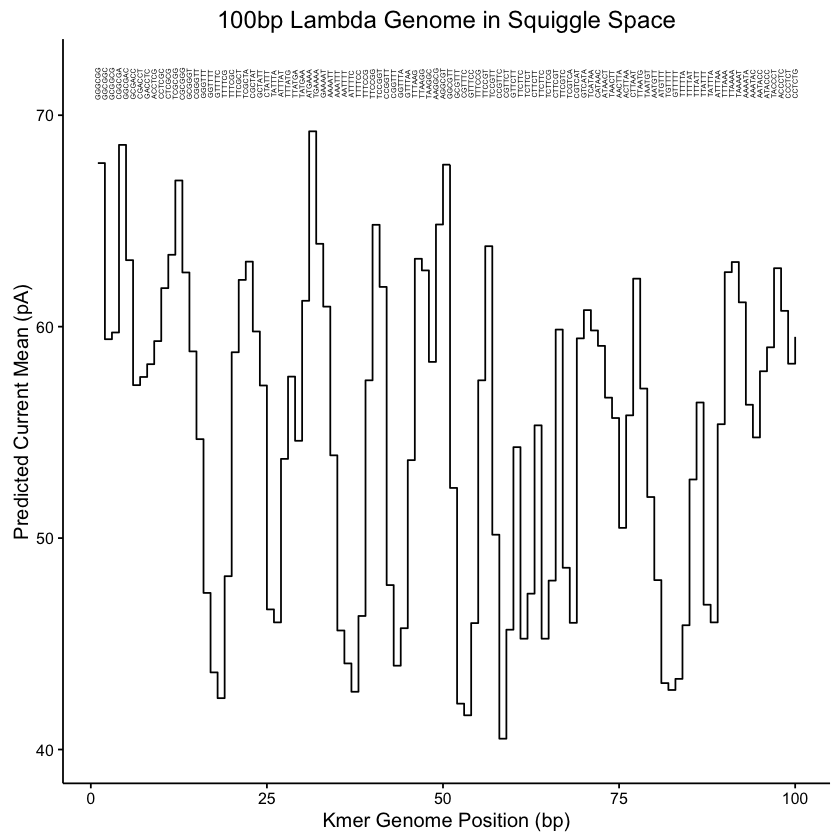

In [3]:
ggplot(data=lambdaref,aes(x=Position, y=Mean))+geom_step() + geom_text(aes(x=Position, y=71.5,label=Kmer), color='black',srt=90, size= 1.5) + theme_classic() + theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank()) + labs(title = "100bp Lambda Genome in Squiggle Space",x = "Kmer Genome Position (bp)", y = "Predicted Current Mean (pA)") + ylim(40,72) + xlim(1, 100)

This figure shows the first 100bp of bacteriophage lambda in squiggle space. Individual kmers are shown above each event in the squiggle. Note that this differs from the figure in the manuscript as it shows every kmer.

### Figure S2

Individual reads derived from a reference are subject to shift, scale and drift variance. Here we simulate the effects of shift, scale and drift on a read.


In [4]:
datlambda1 = read.csv("data/figS1/lambda1.csv", header = TRUE)


###Shifted Data - shift the mean by +20 pA

shiftdata = datlambda1[50:200,]
shiftdata$Mean <- (shiftdata$Mean+20)



###Scaled Data - apply an extreme rescaling for illustrative purposes
scaledata = datlambda1[50:200,]
rescale <- function(x) (x-min(x))/(max(x) - min(x)) * 100
scaledata$Mean <- rescale(scaledata$Mean)



###Drift Data - apply extreme drift of 10 pA over 150 events for illustrative purposes
driftdata = datlambda1[50:200,]
driftdata$Count <- seq(from=0, to=150, by=1)
driftdata$Mean <- driftdata$Mean + (driftdata$Count/50)*10



Now we investigate the consequences of normalising each of these data sets using a simple Z-score.

In [5]:
###Z Score Normalising

#Normalise the original read.

znormdata = datlambda1[50:200,]
znormdata$Mean <- (znormdata$Mean - mean(znormdata$Mean))/sd(znormdata$Mean)

#Normalise the shifted read
znormshift = shiftdata
znormshift$Mean <- (znormshift$Mean - mean(znormshift$Mean))/sd(znormshift$Mean)

#Normalise the scaled read
znormscale = scaledata
znormscale$Mean <- (znormscale$Mean - mean(znormscale$Mean))/sd(znormscale$Mean)

#Normalise the drift read
znormdrift = driftdata
znormdrift$Mean <- (znormdrift$Mean - mean(znormdrift$Mean))/sd(znormdrift$Mean)


Now we plot the 8 datasets:

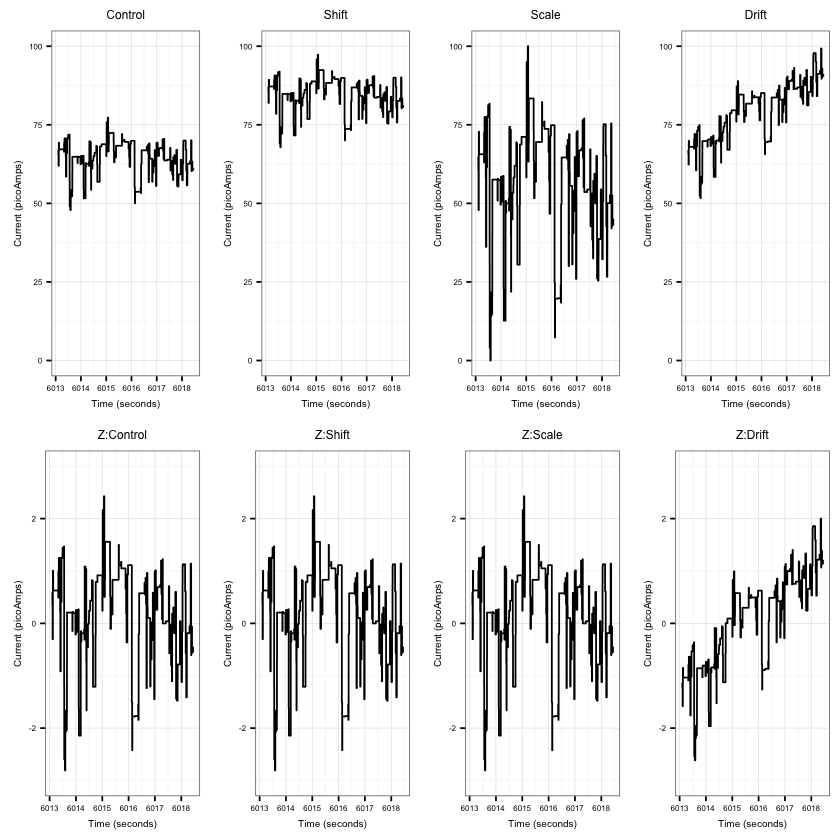

In [6]:
S1A<-ggplot(data=datlambda1[50:200,], aes(x=Time, y=Mean) )+geom_step()+labs(title = "Control",x = "Time (seconds)")+labs(y="Current (picoAmps)") + theme_bw() + theme(text = element_text(size=6)) + ylim(0,100)
S1B<-ggplot(data=shiftdata, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Shift",x = "Time (seconds)")+labs(y="Current (picoAmps)") + theme_bw() + theme(text = element_text(size=6))+ ylim(0,100)
S1C<-ggplot(data=scaledata, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Scale",x = "Time (seconds)")+labs(y="Current (picoAmps)") + theme_bw() + theme(text = element_text(size=6))+ ylim(0,100)
S1D<-ggplot(data=driftdata, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Drift",x = "Time (seconds)")+labs(y="Current (picoAmps)") + theme_bw() + theme(text = element_text(size=6))+ ylim(0,100)
S1E<-ggplot(data=znormdata, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Z:Control",x = "Time (seconds)")+labs(y="Current (picoAmps)")+ theme_bw() + theme(text = element_text(size=6))+ ylim(-3,3)
S1F<-ggplot(data=znormshift, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Z:Shift",x = "Time (seconds)")+labs(y="Current (picoAmps)")+ theme_bw() + theme(text = element_text(size=6))+ ylim(-3,3)
S1G<-ggplot(data=znormscale, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Z:Scale",x = "Time (seconds)")+labs(y="Current (picoAmps)")+ theme_bw() + theme(text = element_text(size=6))+ ylim(-3,3)
S1H<-ggplot(data=znormdrift, aes(x=Time, y=Mean) )+geom_step()+labs(title = "Z:Drift",x = "Time (seconds)")+labs(y="Current (picoAmps)")+ theme_bw() + theme(text = element_text(size=6))+ ylim(-3,3)
grid.arrange(S1A, S1B, S1C, S1D,S1E,S1F,S1G,S1H, nrow=2,ncol=4)

### Figure S1 B,C

Next we consider the impact of in/dels with respect to events on real reads in nanopore data. This is the motivation for considering Dynamic Time Warping for mapping reads to reference.

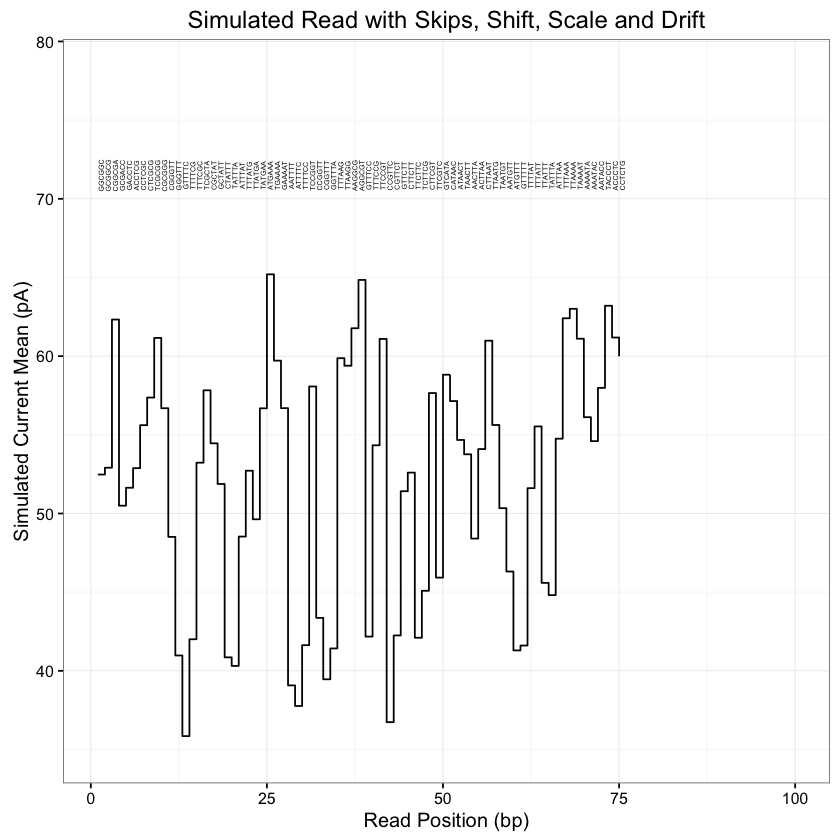

In [7]:
##Simulate skipped events by deleting 25 random rows from data set
lambdadel = lambdaref[-sample(1:nrow(lambdaref), 25), ]
##Generate Corrected Positions for the new read
z<- seq(1, length.out=nrow(lambdadel), by=1)
lambdadel <- cbind(CorrectedPos=z,lambdadel)
ggplot(data=lambdadel,aes(x=CorrectedPos, y=((Mean*1.05)+(0.1*CorrectedPos))-10))+geom_step() + geom_text(aes(x=CorrectedPos+0.5, y=71.5,label=Kmer), color='black',srt=90, size= 1.5) + theme_bw() + labs(title = "Simulated Read with Skips, Shift, Scale and Drift",x = "Read Position (bp)", y = "Simulated Current Mean (pA)") + xlim(1, 100) + ylim(35,78)

In [8]:
lambdadel[,seq(1, length(lambdadel), 5)]
typeof(lambdadel)
i <- 1
lambdadel[1:(i+6)==(i+6),]

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75

[1] "list"

,CorrectedPos,Position,Kmer,Mean
10,7,10,CCTCGC,61.82141
19,14,19,TTTTCG,48.1977
27,21,27,ATTTAT,53.74607
36,28,36,AATTTT,44.07185
46,35,46,TTTAAG,63.20996
58,42,58,CCGTTC,40.51242
67,49,67,TTCGTC,48.59647
77,56,77,CTTAAT,62.26978
86,63,86,TTTATT,56.41231
93,70,93,AAAATA,56.30628


#### Figure S1B - showing the effective truncation of a read with skips (i.e deleted events)

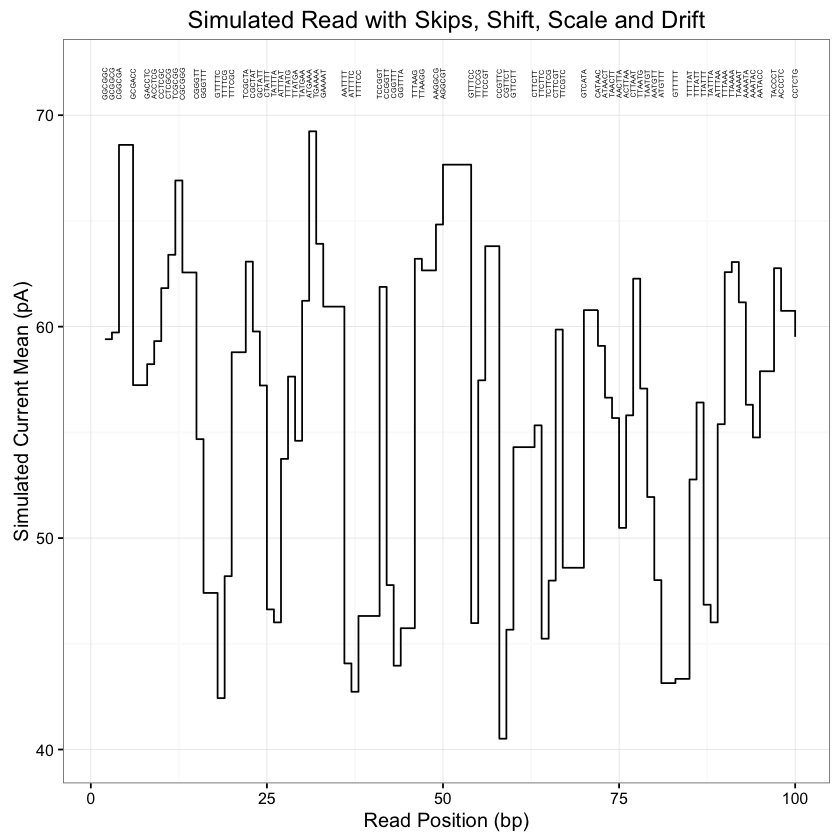

In [9]:
ggplot(data=lambdadel,aes(x=Position, y=Mean))+geom_step() + geom_text(aes(x=Position, y=71.5,label=Kmer), color='black',srt=90, size= 1.5) + theme_bw() + labs(title = "Simulated Read with Skips, Shift, Scale and Drift",x = "Read Position (bp)", y = "Simulated Current Mean (pA)") + xlim(1, 100) + ylim(40,72)


#### Figure S1C showing the same read as S1B corrected for skips.